In [23]:
# Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [24]:
# Create a set of random latitude and longitude combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [25]:
# Create a practice set of random latitude and longitude combinations
x = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
y = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
coordinates = zip(x, y)

In [26]:
# Use the tuple() function to display the latitude and longitude combinations
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

25.12903645 -67.59741259
25.92017388 11.09532135
26.62509167 74.84233102
-59.98969384 -76.89176677
37.30571269 -61.13376282


In [27]:
# Add the latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [28]:
# Use the citipy module to determine city based on latitude and longitude
from citipy import citipy

In [29]:
# Use the tuple() function to display the latitude and longitude combinations
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

katsuura jp
beringovskiy ru
jamestown sh
toliary mg
kaitangata nz
hithadhoo mv
jamestown sh
bocaiuva br
provideniya ru
bluff nz
tabou ci
tiksi ru
belushya guba ru
pangai to
cabo san lucas mx
albany au
manali in
barrow us
vaini to
vaini to
nizhneudinsk ru
jamestown sh
havoysund no
leningradskiy ru
carnarvon au
jamestown sh
beipiao cn
vao nc
bombay in
skalistyy ru
thompson ca
saint-philippe re
rikitea pf
hobart au
la palma pa
punta arenas cl
edd er
malente de
nikolskoye ru
ushuaia ar
rikitea pf
coquimbo cl
atuona pf
ponta do sol cv
busselton au
ribeira grande pt
illoqqortoormiut gl
gizo sb
katsuura jp
hithadhoo mv
iqaluit ca
castro cl
salalah om
bubaque gw
wanning cn
chokurdakh ru
sainte-maxime fr
kuching my
hithadhoo mv
tiksi ru
port alfred za
atuona pf
mahebourg mu
vaini to
tasiilaq gl
vaini to
mys shmidta ru
east london za
sao joao da barra br
rikitea pf
bereda so
airai pw
castro cl
lebu cl
la peca pe
sol-iletsk ru
komsomolskiy ru
hami cn
vaini to
hasaki jp
tuktoyaktuk ca
new norfolk 

cape town za
ushuaia ar
jamestown sh
yagoua cm
high level ca
port macquarie au
mao td
rikitea pf
aleysk ru
punta arenas cl
illoqqortoormiut gl
grand gaube mu
kapaa us
husavik is
cabo san lucas mx
samarai pg
barentsburg sj
albany au
castro cl
mount gambier au
east london za
kokopo pg
vila franca do campo pt
attawapiskat ca
batemans bay au
thompson ca
diego de almagro cl
baijiantan cn
codrington ag
touros br
vaini to
kaitangata nz
kenai us
ushuaia ar
gizo sb
upernavik gl
avarua ck
bugiri ug
port alfred za
saint-philippe re
mocuba mz
hilo us
rabo de peixe pt
belushya guba ru
hilo us
shimoda jp
busselton au
marcona pe
eureka us
bluff nz
nikolskoye ru
prince rupert ca
severo-kurilsk ru
albany au
punta arenas cl
bur gabo so
tiksi ru
bargi in
lebu cl
meyungs pw
lagoa pt
atuona pf
coahuayana mx
cape town za
belushya guba ru
albany au
palmares cr
alenquer br
hasaki jp
humberto de campos br
mataura pf
port lincoln au
yellowknife ca
bethel us
ileza ru
kyra ru
avarua ck
new norfolk au
hurghada eg


hobart au
vaini to
mataura pf
rikitea pf
hobart au
mataura pf
lata sb
ushuaia ar


In [30]:
# Create a list for holding the cities
cities = []

# Identify the nearest city for each latitude and longitude combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

596

In [31]:
# Import the requests library
import requests

# Import the API key
from config import weather_api_key

In [32]:
# Build the basic URL for the OpenWeatherMap with your weather_api_key added to the URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [33]:
# Import the datetime module from the datetime library
from datetime import datetime

In [34]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.

    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | katsuura
Processing Record 2 of Set 1 | beringovskiy
Processing Record 3 of Set 1 | jamestown
Processing Record 4 of Set 1 | toliary
City not found. Skipping...
Processing Record 5 of Set 1 | kaitangata
Processing Record 6 of Set 1 | hithadhoo
Processing Record 7 of Set 1 | bocaiuva
Processing Record 8 of Set 1 | provideniya
Processing Record 9 of Set 1 | bluff
Processing Record 10 of Set 1 | tabou
Processing Record 11 of Set 1 | tiksi
Processing Record 12 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 13 of Set 1 | pangai
Processing Record 14 of Set 1 | cabo san lucas
Processing Record 15 of Set 1 | albany
Processing Record 16 of Set 1 | manali
Processing Record 17 of Set 1 | barrow
Processing Record 18 of Set 1 | vaini
Processing Record 19 of Set 1 | nizhneudinsk
Processing Record 20 of Set 1 | havoysund
Processing Record 21 of Set 1 | leningradskiy
Processing Record 22 

Processing Record 39 of Set 4 | marsabit
Processing Record 40 of Set 4 | gachala
Processing Record 41 of Set 4 | hermanus
Processing Record 42 of Set 4 | kyren
Processing Record 43 of Set 4 | kavaratti
Processing Record 44 of Set 4 | nishihara
Processing Record 45 of Set 4 | san diego de los banos
Processing Record 46 of Set 4 | amderma
City not found. Skipping...
Processing Record 47 of Set 4 | pervomayskoye
Processing Record 48 of Set 4 | palabuhanratu
City not found. Skipping...
Processing Record 49 of Set 4 | senanga
Processing Record 50 of Set 4 | gimbi
Processing Record 1 of Set 5 | manzil tamim
City not found. Skipping...
Processing Record 2 of Set 5 | baruun-urt
Processing Record 3 of Set 5 | bac lieu
Processing Record 4 of Set 5 | kytlym
City not found. Skipping...
Processing Record 5 of Set 5 | calvinia
Processing Record 6 of Set 5 | vardo
Processing Record 7 of Set 5 | jonuta
Processing Record 8 of Set 5 | aurillac
Processing Record 9 of Set 5 | parfenyevo
Processing Record 

Processing Record 27 of Set 8 | alenquer
Processing Record 28 of Set 8 | humberto de campos
Processing Record 29 of Set 8 | port lincoln
Processing Record 30 of Set 8 | ileza
Processing Record 31 of Set 8 | kyra
Processing Record 32 of Set 8 | hurghada
Processing Record 33 of Set 8 | tumannyy
City not found. Skipping...
Processing Record 34 of Set 8 | lazurne
Processing Record 35 of Set 8 | sorland
Processing Record 36 of Set 8 | mangai
Processing Record 37 of Set 8 | muroran
Processing Record 38 of Set 8 | poiana cristei
Processing Record 39 of Set 8 | narasannapeta
Processing Record 40 of Set 8 | bambanglipuro
Processing Record 41 of Set 8 | simbahan
Processing Record 42 of Set 8 | tarko-sale
Processing Record 43 of Set 8 | kloulklubed
Processing Record 44 of Set 8 | stokmarknes
Processing Record 45 of Set 8 | aljezur
Processing Record 46 of Set 8 | lieksa
Processing Record 47 of Set 8 | lethem
Processing Record 48 of Set 8 | alta floresta
Processing Record 49 of Set 8 | santa rosa
P

Processing Record 20 of Set 12 | agboville
Processing Record 21 of Set 12 | callaway
Processing Record 22 of Set 12 | kampot
Processing Record 23 of Set 12 | damavand
Processing Record 24 of Set 12 | bud
Processing Record 25 of Set 12 | huilong
Processing Record 26 of Set 12 | sarankhola
Processing Record 27 of Set 12 | sulmona
Processing Record 28 of Set 12 | gat
Processing Record 29 of Set 12 | ust-tsilma
Processing Record 30 of Set 12 | turtkul
City not found. Skipping...
Processing Record 31 of Set 12 | ugoofaaru
Processing Record 32 of Set 12 | virden
Processing Record 33 of Set 12 | bahia honda
Processing Record 34 of Set 12 | banting
Processing Record 35 of Set 12 | bingol
Processing Record 36 of Set 12 | ippy
Processing Record 37 of Set 12 | marzuq
Processing Record 38 of Set 12 | scarborough
Processing Record 39 of Set 12 | yanan
City not found. Skipping...
Processing Record 40 of Set 12 | saint-joseph
Processing Record 41 of Set 12 | sabya
Processing Record 42 of Set 12 | elb

In [35]:
len(city_data)

557

In [36]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Katsuura,35.13,140.30,73.99,100,75,10.29,JP,2020-07-09 18:21:15
1,Beringovskiy,63.05,179.32,53.62,74,96,2.10,RU,2020-07-09 18:21:15
2,Jamestown,42.10,-79.24,86.00,51,20,5.82,US,2020-07-09 18:16:22
3,Kaitangata,-46.28,169.85,48.00,73,40,8.01,NZ,2020-07-09 18:21:16
4,Hithadhoo,-0.60,73.08,85.06,68,100,3.47,MV,2020-07-09 18:21:16
5,Bocaiuva,-17.11,-43.81,84.20,25,0,5.82,BR,2020-07-09 18:21:16
6,Provideniya,64.38,-173.30,50.81,82,25,1.48,RU,2020-07-09 18:21:17
7,Bluff,-46.60,168.33,49.78,78,94,19.10,NZ,2020-07-09 18:21:17
8,Tabou,4.42,-7.35,77.47,83,91,11.27,CI,2020-07-09 18:21:17
9,Tiksi,71.69,128.87,33.98,94,99,8.41,RU,2020-07-09 18:21:17


In [41]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [42]:
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Katsuura,JP,2020-07-09 18:21:15,35.13,140.30,73.99,100,75,10.29
1,Beringovskiy,RU,2020-07-09 18:21:15,63.05,179.32,53.62,74,96,2.10
2,Jamestown,US,2020-07-09 18:16:22,42.10,-79.24,86.00,51,20,5.82
3,Kaitangata,NZ,2020-07-09 18:21:16,-46.28,169.85,48.00,73,40,8.01
4,Hithadhoo,MV,2020-07-09 18:21:16,-0.60,73.08,85.06,68,100,3.47
...,...,...,...,...,...,...,...,...,...
552,Sabya,SA,2020-07-09 18:24:24,17.15,42.63,93.20,46,4,13.87
553,Elban,RU,2020-07-09 18:24:24,50.10,136.51,54.88,94,100,2.95
554,Berlevag,NO,2020-07-09 18:24:24,70.86,29.09,46.40,93,75,17.22
555,Mogadishu,SO,2020-07-09 18:24:25,2.04,45.34,78.48,82,20,15.61


In [43]:
# Create the output file (CSV)
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV
city_data_df.to_csv(output_data_file, index_label="City_ID")

PermissionError: [Errno 13] Permission denied: 'weather_data/cities.csv'

In [44]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [47]:
# Import the time module
import time

# Get today's date in seconds.
today = time.time()
today = time.strftime("%x")
today

'07/09/20'

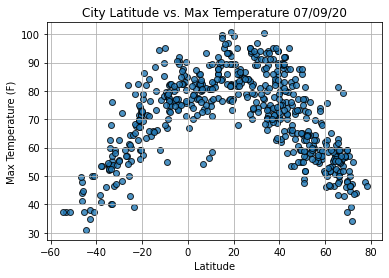

In [48]:
# Build the scatter plot for latitude vs. max temperature
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig1.png")

# Show plot
plt.show()

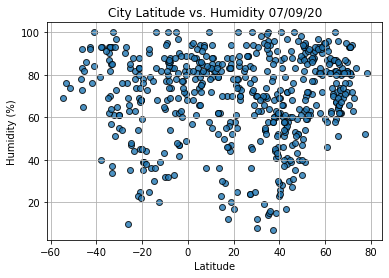

In [49]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig2.png")

# Show plot
plt.show()

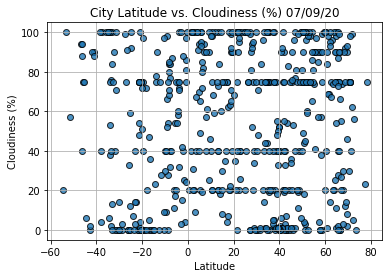

In [50]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig3.png")

# Show plot
plt.show()